In [89]:
import random
import pandas as pd
import numpy as np
from pandas import Series,DataFrame


In [90]:
# Prepping the data
data= pd.read_csv('C:\BSY\Data science\python\Recommendation\Master_data.csv')
data.head()

,User_id,Mf_id,Name,Plan,Category,Num_times_searched,Num_times_clicked,Time_spent,Added_watchlist,Purchased,watchlist_dummy_generator,purchased_dummy_ generator
0,1,21,Axis Long Term Equity Fund - GrowthELSS,Regular,ELSS,10,10,34,0,0,8,5
1,1,280,Taurus Taxshield - Direct Plan - GrowthELSS,Direct Plan,ELSS,13,5,145,0,0,18,9
2,1,112,ICICI Prudential Bluechip Fund - Direct Plan -...,Direct Plan,Large Cap Fund,10,10,37,1,0,3,14
3,1,74,Edelweiss Long Term Equity Fund (Tax Savings) ...,Direct Plan,ELSS,11,4,8,0,0,18,5
4,1,73,Edelweiss Large Cap Fund - GrowthLarge Cap Fund,Regular,Large Cap Fund,10,6,142,0,0,14,14


In [91]:
data.drop(['watchlist_dummy_generator','purchased_dummy_ generator'],axis=1,inplace=True)
#data.head()
data.describe()

,User_id,Mf_id,Num_times_searched,Num_times_clicked,Time_spent,Added_watchlist,Purchased
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,99.704800,145.829800,10.054400,5.516200,153.519400,0.146200,0.068400
std,57.620796,87.893915,5.775752,3.214375,86.454002,0.353342,0.252456
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,50.750000,71.000000,5.000000,3.000000,78.000000,0.000000,0.000000
50%,99.000000,141.000000,10.000000,6.000000,155.000000,0.000000,0.000000
75%,149.000000,222.000000,15.000000,8.000000,229.000000,0.000000,0.000000
max,200.000000,300.000000,20.000000,15.000000,300.000000,1.000000,1.000000


In [92]:
# normalising the values to have a common scaler
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
data[['Num_times_searched','Num_times_clicked','Time_spent']]=mms.fit_transform(data[['Num_times_searched','Num_times_clicked','Time_spent']])
#data.head()

In [93]:
#creating a db of unique mf names
import warnings
warnings.filterwarnings("ignore")
mf_unique_list=data.drop_duplicates(subset=['Mf_id'])
mf_unique_list.drop(['Plan','Category','Num_times_searched','Num_times_clicked','Time_spent','Added_watchlist','Purchased'],axis=1,inplace=True)
mf_unique_list.head()


,User_id,Mf_id,Name
0,1,21,Axis Long Term Equity Fund - GrowthELSS
1,1,280,Taurus Taxshield - Direct Plan - GrowthELSS
2,1,112,ICICI Prudential Bluechip Fund - Direct Plan -...
3,1,74,Edelweiss Long Term Equity Fund (Tax Savings) ...
4,1,73,Edelweiss Large Cap Fund - GrowthLarge Cap Fund


In [94]:
#creating the Affinity /Likablity index 

data['Affinity_score']=data['Num_times_searched']*1 + data['Num_times_clicked']*1.5 + \
data['Time_spent']*2 + data['Added_watchlist']*3 + data['Purchased']*5
data.head()

,User_id,Mf_id,Name,Plan,Category,Num_times_searched,Num_times_clicked,Time_spent,Added_watchlist,Purchased,Affinity_score
0,1,21,Axis Long Term Equity Fund - GrowthELSS,Regular,ELSS,0.50,0.666667,0.110368,0,0,1.720736
1,1,280,Taurus Taxshield - Direct Plan - GrowthELSS,Direct Plan,ELSS,0.65,0.333333,0.481605,0,0,2.113211
2,1,112,ICICI Prudential Bluechip Fund - Direct Plan -...,Direct Plan,Large Cap Fund,0.50,0.666667,0.120401,1,0,4.740803
3,1,74,Edelweiss Long Term Equity Fund (Tax Savings) ...,Direct Plan,ELSS,0.55,0.266667,0.023411,0,0,0.996823
4,1,73,Edelweiss Large Cap Fund - GrowthLarge Cap Fund,Regular,Large Cap Fund,0.50,0.400000,0.471572,0,0,2.043144


In [95]:
data.describe()

,User_id,Mf_id,Num_times_searched,Num_times_clicked,Time_spent,Added_watchlist,Purchased,Affinity_score
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,99.704800,145.829800,0.502720,0.367747,0.510098,0.146200,0.068400,2.855137
std,57.620796,87.893915,0.288788,0.214292,0.289144,0.353342,0.252456,1.799104
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140468
25%,50.750000,71.000000,0.250000,0.200000,0.257525,0.000000,0.000000,1.687500
50%,99.000000,141.000000,0.500000,0.400000,0.515050,0.000000,0.000000,2.323579
75%,149.000000,222.000000,0.750000,0.533333,0.762542,0.000000,0.000000,3.243060
max,200.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.659532


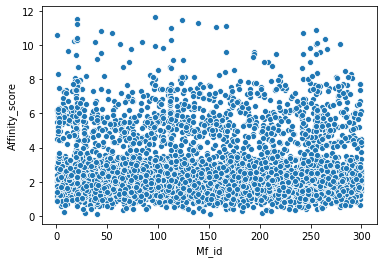

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.scatterplot('Mf_id','Affinity_score',data=data)

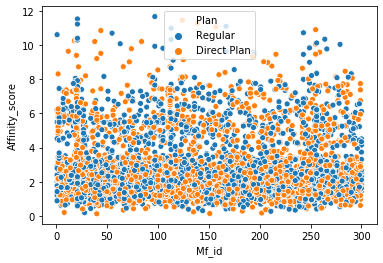

In [97]:

sns.scatterplot('Mf_id','Affinity_score',data=data, hue='Plan')
#sns.scatterplot('Mf_id','Affinity_score',data=data, hue='Category')
#sns.catplot( 'Purchased', 'Affinity_score', data=data, kind='violin')
#sns.scatterplot( 'Mf_id', 'Affinity_score', data=data, hue='Purchased')

In [98]:
#creating User-item interaction matrix
ui_matrix= data.pivot_table(index='User_id', columns='Mf_id', values='Affinity_score')
ui_matrix.head()

Mf_id,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
User_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,1.328428,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.201003,NaN,NaN,NaN,NaN,NaN,NaN,2.217726
2,NaN,NaN,NaN,NaN,NaN,NaN,1.052341,NaN,NaN,3.136622,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.301171
3,NaN,5.158027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.750167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,2.322575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,2.052843,NaN,NaN,2.405853,NaN,2.290970,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.651171,2.491304


In [100]:
#Replacing  NaN with 0 values
ui_matrix.fillna(0,inplace=True)
ui_matrix.head(10)

Mf_id,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
User_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.000000,0.000000,1.328428,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,1.201003,0.0,0.0,0.0,0.0,0.000000,0.000000,2.217726
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.052341,0.0,0.000000,3.136622,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,2.301171
3,0.0,5.158027,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,4.750167,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,0.0,0.000000,2.322575,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
5,0.0,2.052843,0.000000,0.000000,2.405853,0.000000,2.290970,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.651171,2.491304
6,0.0,0.000000,2.614883,2.989465,0.000000,0.000000,0.000000,0.0,3.061706,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
7,0.0,0.000000,0.000000,0.000000,4.465719,5.373411,7.324415,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.226923,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [13]:
#just cheking  the sparcity oft he UImatrix
sparsity = 1.0 - ( np.count_nonzero(ui_matrix) / float(ui_matrix.size) )
print(sparsity)

0.92005


In [62]:
#Top rated MF
top_mf=data.groupby('Mf_id')['Affinity_score'].mean().sort_values(ascending=False).head(10)
print(top_mf)

Mf_id
20     4.135373
124    4.041112
21     4.024706
113    4.003594
256    3.994697
112    3.987043
105    3.945926
97     3.911497
243    3.904290
249    3.872732
Name: Affinity_score, dtype: float64


In [63]:
# finding user similarity using cosine similarity

from sklearn.metrics.pairwise import cosine_similarity
cs = cosine_similarity(ui_matrix)
#make digonal zerod otherwise same user will  be selected as most simialar user
np.fill_diagonal(cs, 0 )
user_similarity = pd.DataFrame(cs,index=ui_matrix.index)
user_similarity.columns=ui_matrix.index
user_similarity.head(10)

User_id,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
User_id,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.095116,0.000000,0.157381,0.052269,0.099496,0.019952,0.134042,0.000000,0.092067,...,0.296293,0.052956,0.068496,0.007870,0.144326,0.163990,0.006187,0.063035,0.213723,0.025146
2,0.095116,0.000000,0.008688,0.079085,0.051065,0.090145,0.043829,0.040186,0.049079,0.145661,...,0.072881,0.026693,0.101113,0.080581,0.028965,0.050112,0.000000,0.242811,0.062424,0.050318
3,0.000000,0.008688,0.000000,0.000000,0.100280,0.008420,0.052874,0.039128,0.015425,0.057042,...,0.064580,0.018442,0.025985,0.023882,0.053517,0.129575,0.272230,0.028051,0.033028,0.021233
4,0.157381,0.079085,0.000000,0.000000,0.064040,0.028225,0.126341,0.134013,0.089402,0.418795,...,0.106343,0.052373,0.107126,0.019915,0.058190,0.044797,0.053042,0.107278,0.010602,0.172077
5,0.052269,0.051065,0.100280,0.064040,0.000000,0.058532,0.106626,0.078830,0.000000,0.000000,...,0.049850,0.038479,0.005820,0.068805,0.110625,0.248932,0.061623,0.032091,0.046487,0.041752
6,0.099496,0.090145,0.008420,0.028225,0.058532,0.000000,0.042900,0.075887,0.000000,0.016774,...,0.021056,0.054595,0.012560,0.084503,0.161890,0.027751,0.067870,0.051617,0.045849,0.097527
7,0.019952,0.043829,0.052874,0.126341,0.106626,0.042900,0.000000,0.043639,0.109237,0.000000,...,0.053981,0.105444,0.065484,0.000000,0.053049,0.025913,0.014272,0.079917,0.069027,0.051490
8,0.134042,0.040186,0.039128,0.134013,0.078830,0.075887,0.043639,0.000000,0.054288,0.031559,...,0.050627,0.056703,0.087052,0.106341,0.142740,0.062724,0.033146,0.157854,0.016233,0.103057
9,0.000000,0.049079,0.015425,0.089402,0.000000,0.000000,0.109237,0.054288,0.000000,0.043357,...,0.045606,0.097897,0.047397,0.098927,0.030579,0.088330,0.000000,0.320216,0.017582,0.070925


In [64]:
def find_n_neighbours(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False).iloc[:n].index, 
          index=['top {}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [65]:
# top 20 neighbours for each user
sim_users = find_n_neighbours(user_similarity,20)
sim_users.head()

,top 1,top 2,top 3,top 4,top 5,top 6,top 7,top 8,top 9,top 10,top 11,top 12,top 13,top 14,top 15,top 16,top 17,top 18,top 19,top 20
User_id,,,,,,,,,,,,,,,,,,,,
1,48,191,50,130,189,136,171,30,88,94,79,163,144,199,47,185,172,176,33,56
2,96,128,165,184,198,130,61,16,115,109,180,117,133,106,13,172,183,20,92,77
3,197,21,114,144,19,143,74,176,94,63,62,121,44,95,41,105,196,65,134,27
4,10,88,85,87,33,11,96,136,144,56,93,47,186,165,13,50,130,103,171,124
5,196,169,178,73,105,27,124,37,25,180,14,114,28,53,89,142,185,65,51,92


In [79]:
#we see for user 1 the most similar user is user_id 48
#let see all the  cosine simiality values for user 1 and  sort them 
user1_sim=cosine_similarity(ui_matrix[:1],ui_matrix[:])
user1_sim.sort()
user1_sim

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00416707,
        0.00570681, 0.00590347, 0.00618653, 0.00639703, 0.006824  ,
        0.00786994, 0.00897843, 0.00901714, 0.01037467, 0.0109663 ,
        0.01246234, 0.01346326, 0.01346991, 0.01415004, 0.01521098,
        0.01659541, 0.01687576, 0.01801513, 0.01814829, 0.01918208,
        0.01995206, 0.02020954, 0.0202976 , 0.02310567, 0.02442892,
        0.02514616, 0.02577859, 0.02849455, 0.03008291, 0.03115969,
        0.03322164, 0.03530181, 0.03700513, 0.03725756, 0.03790793,
        0.03846242, 0.03847556, 0.03920776, 0.04186572, 0.04227361,
        0.04288258, 0.0431037 , 0.04322958, 0.04336772, 0.04470988,
        0.04697937, 0.04751022, 0.04783281, 0.04926578, 0.04933399,
        0.05226865, 0.05236093, 0.05251447, 0.05295593, 0.05454457,
        0.05458831, 0.05714255, 0.05775944, 0.05786331, 0.05828991,
        0.05834345, 0.06002781, 0.06059654, 0.06

In [67]:
#we see the 2nd highest simlarity value is .3183
#it should of user_id 48.. lets see
cosine_similarity(ui_matrix[:1],ui_matrix[47:48])

array([[0.318817]])

In [68]:

def User_item_score(user,item):
#a is simialr users list
    a = sim_users[sim_users.index==user].values
#squeezing sim user into a list 
    b = a.squeeze().tolist()
#finding affinity score of item
    c = ui_matrix.loc[:,item]
# mapping user with affinity score
    d = c[c.index.isin(b)]
    index = d.index.values.squeeze().tolist()
#mapping the cosine similarity for the users
    corr = user_similarity.loc[user,index]
#calculating the final score
    fin = pd.concat([d, corr], axis=1)
    fin.columns = ['Affinity_score','correlation']
    fin['score']=fin.apply(lambda x:x['Affinity_score'] * x['correlation'],axis=1)
    final_score=fin['score'].sum()/fin['correlation'].sum()
    return final_score

In [101]:
#just cheking
score = User_item_score(5,21)
print("(u,i) score is",score)

(u,i) score is 0.671991963439267


In [70]:
#creating a comma seprated user-item list that list all the items interacted by an user
item_list = data.astype({"Mf_id": str})
user_item_list= item_list.groupby(by = 'User_id')['Mf_id'].apply(lambda x:','.join(x))


In [109]:
def recommended_items(user):
    user_interacted_items= ui_matrix.columns[ui_matrix[ui_matrix.index==user].any()].tolist()
    a = sim_users[sim_users.index==user].values
# b is list of similar users
    b = a.squeeze().tolist()
    d = user_item_list[user_item_list.index.isin(b)]
    l = ','.join(d.values)
    items_interacted_by_similar_users = l.split(',')
# items_under_consideration are itesm that are interatced by similar users but yet to be interacted by our user

    items_under_consideration = list(set(items_interacted_by_similar_users)-set(list(map(str,user_interacted_items ))))
    items_under_consideration = list(map(int, items_under_consideration))
    score = []
    for item in items_under_consideration:
        c = ui_matrix.loc[:,item]
        d = c[c.index.isin(b)] # d has the affinity score mapped with user
        index = d.index.values.squeeze().tolist()
        corr = user_similarity.loc[user,index]
        fin = pd.concat([d, corr], axis=1)
        fin.columns = ['Affinity_score','correlation']
        fin['score']=fin.apply(lambda x:x['Affinity_score'] * x['correlation'],axis=1)
        final_score=fin['score'].sum()/fin['correlation'].sum()
        score.append(final_score)
    temp = pd.DataFrame({'Mf_id':items_under_consideration,'score':score})
   
    top_5_recommendation = temp.sort_values(by='score',ascending=False).head(5)
    top5=top_5_recommendation.to_string(index=False)
 
    mf_recommendation_details =  top_5_recommendation.merge(mf_unique_list, how='inner', on='Mf_id')
    recommendation_print=    mf_recommendation_details.drop(['User_id'],axis=1)
    print("----------------------------------------------------------------------------------------------")
    print ("The top 5 highest rated mf by similar users")
    print(" ")
    print (recommendation_print)
    print(" ")
    print("----------------------------------------------------------------------------------------------")
    mf_recommendation_list = mf_recommendation_details.Name.values.tolist()
    return  mf_recommendation_list

In [110]:
user_range=list(range(1,201))

user=''
ask=True
while user not in user_range:
    user = int(input("Enter the user id to whom you want to recommend :1-200 "))
    if user not in user_range:
        print("invalid input: please enter correct value in the range:  1-200") 
print ("The current usage profile of user no ",user," is:")


print("   ")

profile = data[(data['User_id'] == user)]
profile_sort=profile.sort_values(by='Affinity_score', ascending=False)
user_top5=profile_sort[['Mf_id','Name','Affinity_score']]
print(user_top5.head(5))
print("   ")

predicted_items = recommended_items(user)
print(" ")
print("The Recommendations for User Id :", user)
print(" ")
for i in predicted_items:
    print(i)
   

Enter the user id to whom you want to recommend :1-200 5
The current usage profile of user no  5  is:
   
     Mf_id                                               Name  Affinity_score
128     24  Axis Short Term Fund - Direct Plan - GrowthSho...        6.446154
108    263  Sundaram Short Term Debt Fund - Direct Plan - ...        6.024749
118    155  Invesco India Tax Plan - Direct Plan - GrowthELSS        5.751839
126     64  DSP Short Term Fund - Direct Plan - GrowthShor...        4.639298
120    119  ICICI Prudential MidCap Fund - GrowthMid Cap Fund        3.865050
   
----------------------------------------------------------------------------------------------
The top 5 highest rated mf by similar users
 
   Mf_id     score                                               Name
0     20  1.478326  Axis Long Term Equity Fund - Direct Plan - Gro...
1    255  1.402095  SBI Short Term Debt Fund - Direct Plan - Growt...
2    104  0.948625  HDFC Top 100 Fund - Direct Plan - GrowthLarge ...
3